In this notebook I will look into the various inputs into Chromopainter and Globetrotter, to figure out why the admixture estimates are so unclear.
Seems to be due to coancestry fragments in all surrogate populations being similar in length.
The identified event makes sense in all cases, but it generally infers very recent admixture with high proportions of flow.
Based on the coancestry curves, this seems to be due to either an underestimation of genetic distance (too low recombination?) or other erronous fit.
Alternative explanations: Globetrotter is optimized for humans, and therefore cant handle the large differences?

In [1]:
%run ../scripts/notebook_settings.py
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")

In [66]:
meta_data_samples.loc[meta_data_samples.C_origin=="Ursinus, Zambia"]

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin,x_missing
124,PD_0692,35221_BZ12030,Rogers/Jolly/Phillips-Conroy,Papio,ursinus (grayfoot),"Dendro Park, Zambia",M,"Dendro Balla Balla Safaris, Namwala, Zambia",26.06255,-16.145438,124,"Ursinus, Zambia",0.014076
125,PD_0693,35225_BZ12031,Rogers/Jolly/Phillips-Conroy,Papio,ursinus (grayfoot),"Dendro Park, Zambia",F,"Dendro Balla Balla Safaris, Namwala, Zambia",26.06255,-16.145438,125,"Ursinus, Zambia",0.009636
126,PD_0694,35227_BZ12032,Rogers/Jolly/Phillips-Conroy,Papio,ursinus (grayfoot),"Dendro Park, Zambia",F,"Dendro Balla Balla Safaris, Namwala, Zambia",26.06255,-16.145438,126,"Ursinus, Zambia",0.009243
127,PD_0695,35229_BZ12033,Rogers/Jolly/Phillips-Conroy,Papio,ursinus (grayfoot),"Dendro Park, Zambia",F,"Dendro Balla Balla Safaris, Namwala, Zambia",26.06255,-16.145438,127,"Ursinus, Zambia",0.009191


In [2]:
cp_dir = "../steps/cp_gt/"
all_chunklengths = pd.read_csv(cp_dir+"all.chunklengths.out", sep = " ")

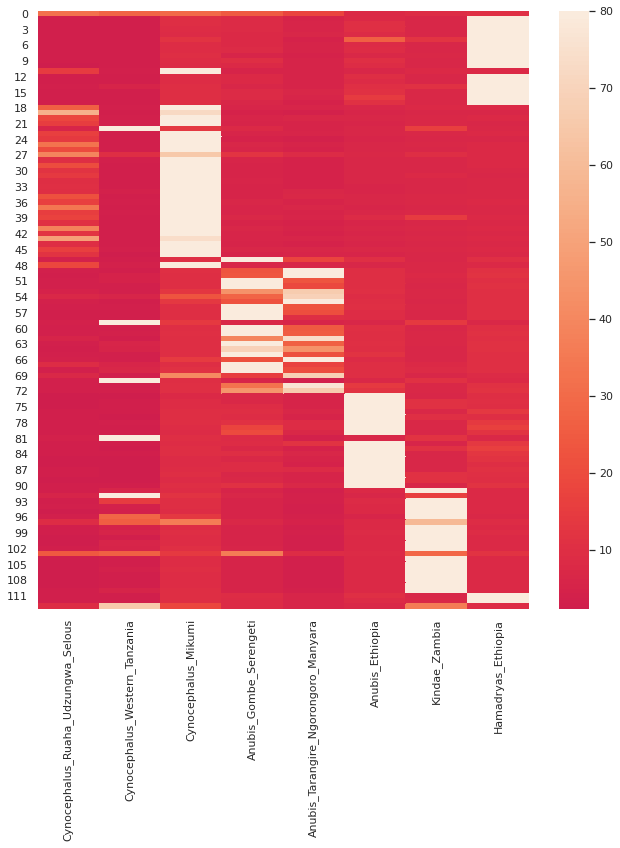

In [3]:
fig, ax = plt.subplots(figsize = (11, 11))
g = sns.heatmap(all_chunklengths.iloc[:,1:], vmax=80, center=0, cmap=sns.color_palette("rocket", as_cmap=True))

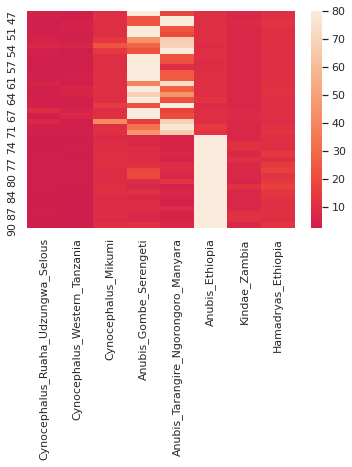

In [4]:
anubis = meta_data_samples.loc[meta_data_samples.Species == "anubis"].PGDP_ID
chunk_subset = all_chunklengths.loc[all_chunklengths.Recipient.isin(anubis)]
g = sns.heatmap(chunk_subset.iloc[:,1:], vmax=80, center=0, cmap=sns.color_palette("rocket", as_cmap=True))

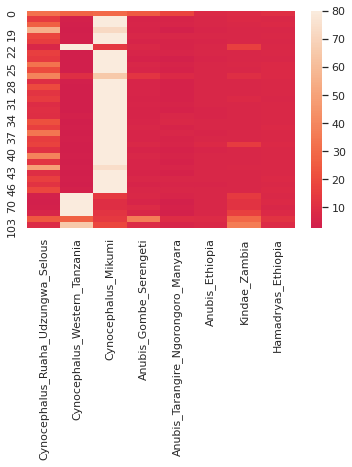

In [5]:
cynocephalus = meta_data_samples.loc[meta_data_samples.Species == "cynocephalus"].PGDP_ID
chunk_subset = all_chunklengths.loc[all_chunklengths.Recipient.isin(cynocephalus)]
g = sns.heatmap(chunk_subset.iloc[:,1:], vmax=80, center=0, cmap=sns.color_palette("rocket", as_cmap=True))

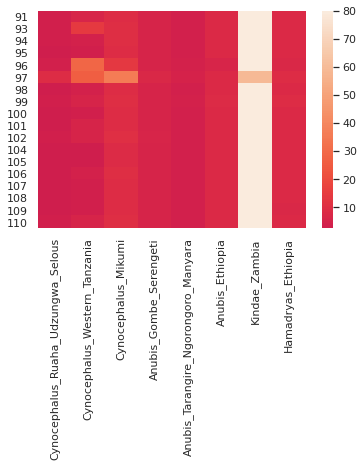

In [6]:
kindae = meta_data_samples.loc[meta_data_samples.Species == "kindae"].PGDP_ID
chunk_subset = all_chunklengths.loc[all_chunklengths.Recipient.isin(kindae)]
g = sns.heatmap(chunk_subset.iloc[:,1:], vmax=80, center=0, cmap=sns.color_palette("rocket", as_cmap=True))

Checking a painting example

In [7]:
f = open(cp_dir+"Anubis_Gombe_Serengeti/chromopaintings/sample0.samples.out")
lines = f.readlines()

In [8]:
len(lines[3].split(" "))

2440625

In [11]:
f = (open("/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/steps/"+
          "cp_gt_scaled_rec/Anubis_Tarangire_Ngorongoro_Manyarascaled_rec/globetrotter.main.txt"))

In [12]:
lines = f.readlines()

In [25]:
admixing_label = lines[11].strip().split(" ")
admixing_number = lines[12].strip().split(" ")
ancestral_label = lines[13].strip().split(" ")
ancestral_number = lines[14].strip().split(" ")

In [26]:
admixing_number

['0.27',
 '0.00925507313631041',
 '0.0106198046802114',
 '0.0127210149049336',
 '0.0762895727617403',
 '0.891114534516804']

In [57]:
data_dict = {}
for i in range(len(admixing_label)):
    data_dict[admixing_label[i]] = float(admixing_number[i])*float(admixing_number[0])

In [60]:
admixing = pd.DataFrame(data=data_dict, index=["admix_proportion"])

In [61]:
admixing = admixing.astype(float)

In [62]:
admixing

,proportion,Hamadryas_Ethiopia,Kindae_Zambia,Cynocephalus_Western_Tanzania,Anubis_Gombe_Serengeti,Cynocephalus_Ruaha_Udzungwa_Selous
admix_proportion,0.0729,0.002499,0.002867,0.003435,0.020598,0.240601


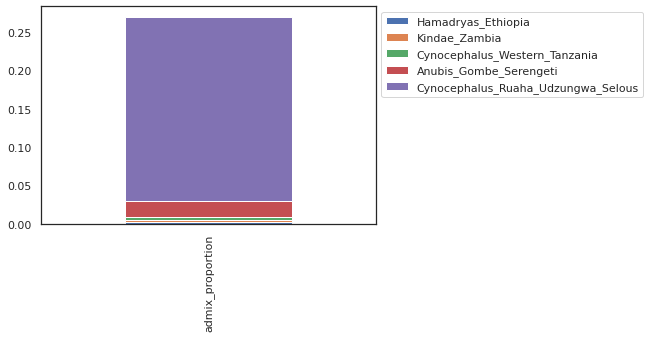

In [65]:
g = admixing.iloc[:,1:].plot(kind="bar", stacked=True)
g.legend(bbox_to_anchor=(1,1))